In [1]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
import os
path = os.getcwd()

In [3]:
path

'D:\\workspace\\Pycharm\\tf25'

In [4]:
abalone_train = pd.read_csv(
#     path + "/abalone/abalone_train.csv",
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [5]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [6]:
normalize = layers.Normalization()

In [7]:
normalize.adapt(abalone_features)

In [8]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 542us/step - loss: 94.0048
Epoch 2/10
104/104 [==============================] - 0s 523us/step - loss: 54.6768
Epoch 3/10
104/104 [==============================] - 0s 549us/step - loss: 17.1702
Epoch 4/10
104/104 [==============================] - 0s 525us/step - loss: 5.9953
Epoch 5/10
104/104 [==============================] - 0s 526us/step - loss: 5.0830
Epoch 6/10
104/104 [==============================] - 0s 529us/step - loss: 4.9694
Epoch 7/10
104/104 [==============================] - 0s 526us/step - loss: 4.9238
Epoch 8/10
104/104 [==============================] - 0s 542us/step - loss: 4.8951
Epoch 9/10
104/104 [==============================] - 0s 518us/step - loss: 4.8792
Epoch 10/10
104/104 [==============================] - 0s 513us/step - loss: 4.9249


In [9]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
# titanic = pd.read_csv(path + "/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


###### Mixed Data Type

In [10]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [11]:
# # Create symbolic Input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [12]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [13]:
print(calc(1))
print(calc(2))

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)


###### make pandas datatype to dictionary of input layer of tensorflow datatype

In [14]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
    
    inputs[name] = tf.keras.Input(shape=(1, ), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

inputs(dictionary)은 titanic_features(dataframe)의 data type을 tf.dtype으로 변형한 변수

dicionary & tf.dtype으로 바꾼 것은 list형태의 concatenate입력으로 사용하여 tf.layer형태로 변형하고 이것을 adapted된 normalization에 입력으로 사용하기 위해서(추정)
concatenate의 입력은 a list of input tensors(1d)

###### check out numeric data and normalize

In [15]:
numeric_inputs = {name:input for name, input in inputs.items() if input.dtype == tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
# # later, check that change titanic_feature[name] to numeric_inputs[name]
norm.adapt(np.array(titanic_features[numeric_inputs.keys()]))

all_numeric_inputs = norm(x)
all_numeric_inputs
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


In [16]:
# # normalize 된 tf.dtype
preprocessed_inputs = [all_numeric_inputs]

In [17]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue
    print(name)
    # # df[name]의 단어를 lookup으로 만들고
    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
    # # lookup을 one-hot encoding 하는 것
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())
    
    # # 만들어진 해당 name에 대한 lookup을 tf.dtype으로 만들어둔 inputs[name] 에 적용한 후, one_hot encodding
    x = lookup(input)
    x = one_hot(x)
    
    # # integer indices & one-hot encodding 된 tf.string형태의 layer를 추가
    preprocessed_inputs.append(x)

sex
class
deck
embark_town
alone


In [18]:
preprocessed_inputs

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_1')>,
 <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'category_encoding_2')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_3')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_4')>]

In [19]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

In [20]:
preprocessed_inputs_cat

<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'concatenate_1')>

###### 아래 model을 만들기 위해서 위의 과정을 거침함
titanic csv를 pd.df로 만들고 pd.df는 normal adapt, lookup의 raw data가 되게 함
normalize는 number type의 계층 각각을 하는 것이 아니라 모아서 한번에 진행
normalize시는 adapt된 것을 tf.dtype으로 만든 inputs의 values를 쌓아서 적용
그리고 나서 모든 층을 concatenate 함

In [21]:
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

In [22]:
tf.keras.utils.plot_model(model=titanic_preprocessing, rankdir='LR', dpi=150, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [23]:
titanic_features_dict = {name: np.array(value) for name, value in titanic_features.items()}

In [24]:
features_dict = {name: value[:1] for name, value in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [25]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64),
        layers.Dense(1)
    ])
    
    preprocessed_inputs = preprocessing_head(inputs)
    results = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, results)
    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam())
    
    return model

In [26]:
titanic_model = titanic_model(titanic_preprocessing, inputs)

In [27]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 840us/step - loss: 0.6488
Epoch 2/10
20/20 [==============================] - 0s 787us/step - loss: 0.5495
Epoch 3/10
20/20 [==============================] - 0s 997us/step - loss: 0.4998
Epoch 4/10
20/20 [==============================] - 0s 788us/step - loss: 0.4716
Epoch 5/10
20/20 [==============================] - 0s 787us/step - loss: 0.4519
Epoch 6/10
20/20 [==============================] - 0s 787us/step - loss: 0.4424
Epoch 7/10
20/20 [==============================] - 0s 787us/step - loss: 0.4347
Epoch 8/10
20/20 [==============================] - 0s 840us/step - loss: 0.4305
Epoch 9/10
20/20 [==============================] - 0s 787us/step - loss: 0.4285
Epoch 10/10
20/20 [==============================] - 0s 735us/step - loss: 0.4264


In [28]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test\assets


In [29]:
before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.745]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.745]], shape=(1, 1), dtype=float32)


In [30]:
import itertools

def slices(features):
    for i in itertools.count():
        # For each feature take index `i`
        example = {name:values[i] for name, values in features.items()}
        yield example

In [31]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [32]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [33]:
for example in features_ds:
    for name, value in example.items():
        print(f"{name:19}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [34]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [35]:
titanic_batchs = titanic_ds.shuffle(len(titanic_ds)).batch(32)

In [36]:
titanic_model.fit(titanic_batchs, epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4231
Epoch 2/5
20/20 [==============================] - 0s 6ms/step - loss: 0.4226
Epoch 3/5
20/20 [==============================] - 0s 1ms/step - loss: 0.4210
Epoch 4/5
20/20 [==============================] - 0s 1ms/step - loss: 0.4224
Epoch 5/5
20/20 [==============================] - 0s 1ms/step - loss: 0.4204


In [37]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
# titanic_file_path = tf.keras.utils.get_file('train.csv', path + 'titanic')

In [38]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(titanic_file_path,
                                                      batch_size=3,
                                                      label_name='survived',
                                                      num_epochs=1,
                                                      ignore_errors=True,)

In [39]:
titanic_csv_ds

<PrefetchDataset element_spec=(OrderedDict([('sex', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('age', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('n_siblings_spouses', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('parch', TensorSpec(shape=(None,), dtype=tf.int32, name=None)), ('fare', TensorSpec(shape=(None,), dtype=tf.float32, name=None)), ('class', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('deck', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('embark_town', TensorSpec(shape=(None,), dtype=tf.string, name=None)), ('alone', TensorSpec(shape=(None,), dtype=tf.string, name=None))]), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20}: {value}")
    print()
    print(f"{'label':20}: {label}")

sex                 : [b'male' b'female' b'female']
age                 : [28.5 24.   4. ]
n_siblings_spouses  : [0 0 0]
parch               : [0 0 1]
fare                : [ 7.229 13.    13.417]
class               : [b'Third' b'Second' b'Third']
deck                : [b'unknown' b'unknown' b'unknown']
embark_town         : [b'Cherbourg' b'Southampton' b'Cherbourg']
alone               : [b'y' b'y' b'n']

label               : [0 0 1]


In [41]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

In [42]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(traffic_volume_csv_gz,
                                                                batch_size=256,
                                                                label_name='traffic_volume',
                                                                num_epochs=1,
                                                                compression_type='GZIP')

for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20}, {value[:5]}")
    print(f"{'label':20}, {label[:5]}")

holiday             , [b'None' b'None' b'None' b'None' b'None']
temp                , [270.48 269.11 266.39 291.72 271.27]
rain_1h             , [0. 0. 0. 0. 0.]
snow_1h             , [0. 0. 0. 0. 0.]
clouds_all          , [ 1 90  1  1 90]
weather_main        , [b'Clear' b'Clouds' b'Clear' b'Clear' b'Clouds']
weather_description , [b'sky is clear' b'overcast clouds' b'sky is clear' b'sky is clear'
 b'overcast clouds']
date_time           , [b'2013-03-23 22:00:00' b'2013-02-09 02:00:00' b'2013-04-04 05:00:00'
 b'2012-10-02 14:00:00' b'2013-01-20 04:00:00']
label               , [4260  525 2605 5181  246]


###### Caching

In [43]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
CPU times: total: 8.19 s
Wall time: 5.13 s


In [44]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
CPU times: total: 891 ms
Wall time: 672 ms


In [45]:
%%time
snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

Instructions for updating:
Use `tf.data.Dataset.snapshot(...)`.
...............................................................................................
CPU times: total: 1.5 s
Wall time: 964 ms


###### Multiple files

In [46]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

In [47]:
import pathlib
font_csvs = sorted(str(p) for p in pathlib.Path('fonts').glob('*.csv'))
font_csvs[:10]

['fonts\\AGENCY.csv',
 'fonts\\ARIAL.csv',
 'fonts\\BAITI.csv',
 'fonts\\BANKGOTHIC.csv',
 'fonts\\BASKERVILLE.csv',
 'fonts\\BAUHAUS.csv',
 'fonts\\BELL.csv',
 'fonts\\BERLIN.csv',
 'fonts\\BERNARD.csv',
 'fonts\\BITSTREAMVERA.csv']

In [48]:
len(font_csvs)

153

In [49]:
fonts_ds = tf.data.experimental.make_csv_dataset(file_pattern = "fonts/*.csv",
                                                batch_size=10, num_epochs=1,
                                                num_parallel_reads=20,
                                                 shuffle=False,
                                                shuffle_buffer_size=10000)

In [50]:
for features in fonts_ds.take(1):
    for i, (name, value) in enumerate(features.items()):
        if i > 15:
            break
        print(f"{name:20}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'AGENCY' b'ARIAL' b'BAITI' b'BANKGOTHIC' b'BASKERVILLE' b'BAUHAUS'
 b'BELL' b'BERLIN' b'BERNARD' b'BITSTREAMVERA']
fontVariant         : [b'AGENCY FB' b'scanned' b'MONGOLIAN BAITI' b'BANKGOTHIC MD BT'
 b'BASKERVILLE OLD FACE' b'BAUHAUS 93' b'BELL MT' b'BERLIN SANS FB DEMI'
 b'BERNARD MT CONDENSED' b'scanned']
m_label             : [64258    48 65311 61442 61442 61442 61442 64258 61442    74]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 0 0 0 0 0 0 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [35  0 32 46 33 35 33 34 33  0]
m_left              : [21  0 36 26 21 24 23 21 21  0]
originalH           : [51 15 46 28 46 45 45 48 53 20]
originalW           : [22 25 24 66 34 30 31 39 31 36]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1   1   1 255   1   1   1   1   1   1]
r0c1                : [  1   1 

In [51]:
import re

temp = 0
def make_images(features):
    image = [None] * 400
    new_feats = {}
    
    for name, value in features.items():
        match = re.match('r(\d+)c(\d+)', name)
        if match:
            image[int(match.group(1)) * 20 + int(match.group(2))] = value
        else:
            new_feats[name] = value
            
    image = tf.stack(image, axis=0)
    image = tf.reshape(image, [20, 20, -1])
    new_feats['image'] = image
    
    return new_feats

In [52]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
    break

아래 표현 중 ['image'][..., n] 이건 뭐? 

C:\Users\winston\anaconda3_64\envs\tf25\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65311 (\N{FULLWIDTH QUESTION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


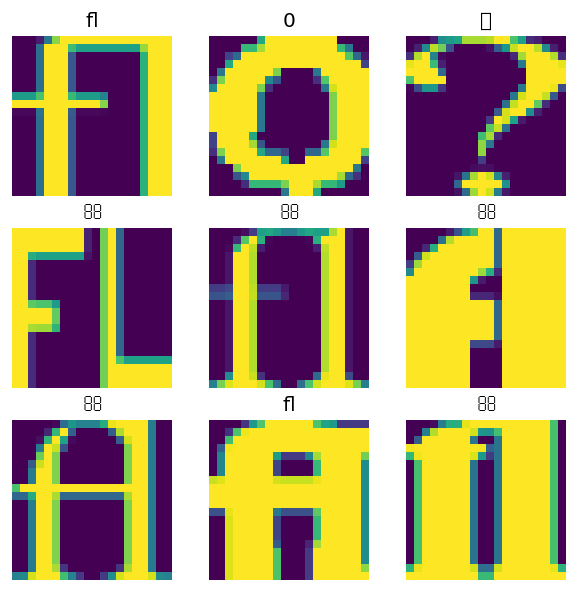

In [53]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 6), dpi=120)

for n in range(9):
    plt.subplot(3, 3, n + 1)
    plt.imshow(features['image'][..., n])
    plt.title(chr(features['m_label'][n]))
    plt.axis('off')

###### Lower Level functions

In [54]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()] * 10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [55]:
features = tf.io.decode_csv(lines, record_defaults=all_strings)

for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [56]:
lines[0]

'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'

In [57]:
for i, t in enumerate(lines[0].split(',')):
    print(i, t)

0 0
1 male
2 22.0
3 1
4 0
5 7.25
6 Third
7 unknown
8 Southampton
9 n


In [58]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [59]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types)

for f in features:
#     print(f)
    print(f"type: {f.dtype.name}, shpae: {f.shape}")

type: int32, shpae: (627,)
type: string, shpae: (627,)
type: float32, shpae: (627,)
type: int32, shpae: (627,)
type: int32, shpae: (627,)
type: float32, shpae: (627,)
type: string, shpae: (627,)
type: string, shpae: (627,)
type: string, shpae: (627,)
type: string, shpae: (627,)


In [60]:
type(features)

list

In [61]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path,
                                                 record_defaults=titanic_types,
                                                header=True)
for example in simple_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [62]:
type(simple_titanic)

tensorflow.python.data.experimental.ops.readers.CsvDatasetV2

In [63]:
def decode_titanic_line(line):
    return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row
    .skip(1)
    # Decode the line
    .map(decode_titanic_line))

In [64]:
for example in manual_titanic.take(1):
    print([e.numpy() for e in example])
#     print(example)

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


###### Multiple files

In [65]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [66]:
num_font_features = len(font_line.split(','))
font_column_types = [str(), str()] + [float()] * (num_font_features - 2)

In [67]:
font_csvs[0]

'fonts\\AGENCY.csv'

In [68]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs, record_defaults=font_column_types, header=True)

In [69]:
for row in simple_font_ds.take(10):
    print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [70]:
font_files = tf.data.Dataset.list_files('fonts/*.csv')

In [71]:
print('Epoch 1:')
for f in list(font_files)[:5]:
    print("      ", f.numpy())
print('      ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
    print("      ", f.numpy())
print('      ...')
print()

Epoch 1:
       b'fonts\\TAHOMA.csv'
       b'fonts\\HAETTENSCHWEILER.csv'
       b'fonts\\EBRIMA.csv'
       b'fonts\\TEMPUS.csv'
       b'fonts\\COUNTRYBLUEPRINT.csv'
      ...

Epoch 2:
       b'fonts\\TAI.csv'
       b'fonts\\PHAGSPA.csv'
       b'fonts\\MODERN.csv'
       b'fonts\\HARRINGTON.csv'
       b'fonts\\MISTRAL.csv'
      ...



In [72]:
def make_font_csv_ds(path):
    return tf.data.experimental.CsvDataset(
        path, record_defaults=font_column_types, header=True)

In [73]:
font_rows = font_files.interleave(make_font_csv_ds, cycle_length=3)

In [74]:
fonts_dict = {'font_name': [], 'charactor': []}
temp = font_rows.take(10)

for row in temp:
    fonts_dict['font_name'].append(row[0].numpy())
    fonts_dict['charactor'].append(chr(row[2].numpy()))

C:\Users\winston\AppData\Local\Temp\ipykernel_15272\131471618.py:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  fonts_dict['charactor'].append(chr(row[2].numpy()))


In [75]:
pd.DataFrame(fonts_dict)

,font_name,charactor
0,b'SNAP',
1,b'FRANKLIN',ﬂ
2,b'COURIER',*
3,b'SNAP',
4,b'FRANKLIN',ﬁ
5,b'COURIER',0
6,b'SNAP',◊
7,b'FRANKLIN',
8,b'COURIER',3
9,b'SNAP',≥


###### Performance

In [76]:
BATCH_SIZE = 2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = 'fonts/*.csv', batch_size=BATCH_SIZE, 
    num_epochs=1,num_parallel_reads=100)

In [77]:
%%time
for i, batch in enumerate(fonts_ds.take(20)):
    print(i, end=', ')
print()

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
CPU times: total: 24.2 s
Wall time: 7.09 s


In [78]:
x

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_4')>

In [88]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1), 
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda y: tf.io.decode_csv(y, record_defaults=font_column_types))

In [89]:
%%time
for i, batch in enumerate(fonts_fast.take(20)):
    print(i, end=', ')
print()

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
CPU times: total: 3.62 s
Wall time: 587 ms


In [81]:
x

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_4')>